<a href="https://colab.research.google.com/github/amanichivilkar/Bike-Sharing-Demand-Prediction/blob/main/Amani_Chivilkar_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Project Title : Seoul Bike Sharing Demand Prediction </b>
----
### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


### **Import of Python Libraries and Defining Function**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
%matplotlib inline
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

#Scoring
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ML
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data/SeoulBikeData.csv", encoding ="ISO-8859-1")

In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
!pip3 install lime

     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=eb8adabe9a5c60539b3dbce241b16a8ec6af9da290776feeb1a0dc3d4eeb885e
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.3 MB/s 


In [ ]:
import shap

In [ ]:
# This gives a dataframe with lable Encoder Applied on the categorical featuure
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
# PLOT weight of the features for decision tree and random forest
def weight(ml):  
     ml.fit(x_train,y_train)
     y_pred = ml.predict(x_test)

     # plot
     df5=pd.DataFrame({"feature":independent,"weight":ml.feature_importances_}).sort_values('weight',ascending=False).head(10)

     plt.figure(figsize=(10,5))
    
     sns.barplot(x=df5.weight,y=df5.feature).set(title=f'Top 10 Important features for {ml}')
     

In [ ]:
# Get the LIME explanation by giving ml modle and sample number to the funtion "explanation"

def explanation(ml,obs_number):
    ml.fit(x_train,y_train)
    y_pred = ml.predict(x_test)

    explanation = explainer.explain_instance(x_test.values[obs_number], ml.predict, num_features=14)
    print(f'predicted_value={y_pred[obs_number]}')
    print(f'Actual_value={y_test.values[obs_number]}')
    explanation.show_in_notebook(show_all=False)

### **Preprosessing Data**

<b> Data Description </b>

<b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of the day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Create Month, Weekdays and Year columns
df['month']=df['Date'].apply(lambda x: x.month)
df['weekday']=df['Date'].dt.day_name()
df['year']=df['Date'].apply(lambda x: x.year)

In [ ]:
# Rename columns
df.rename(columns={'Date':"date", 'Rented Bike Count':'rented_bike_count', 'Hour':"hour", 'Temperature(°C)':'temp', 'Humidity(%)':'humidity%',
       'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 'Dew point temperature(°C)':'dev_point_temp',
       'Solar Radiation (MJ/m2)':'solar_radiation', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)':'snowfall', 'Seasons':'season',
       'Holiday':'holiday', 'Functioning Day':'function_day'}, inplace=True)

In [ ]:
# Convert columns into categories
df.apply(lambda x: len(x.unique()))

date                  365
rented_bike_count    2166
hour                   24
temp                  546
humidity%              90
wind_speed             65
visibility           1789
dev_point_temp        556
solar_radiation       345
rainfall               61
snowfall               51
season                  4
holiday                 2
function_day            2
month                  12
weekday                 7
year                    2
dtype: int64

In [ ]:
# Clearly "season","holiday","function_day" are the categories
for col in ["season","holiday","function_day"]:
  df[col]=df[col].astype("category")

### **EDA and Visualization Analysis**

In [ ]:
# Numeric columns
numerical=['rented_bike_count','temp', 'humidity%', 'wind_speed','visibility', 'dev_point_temp', 'solar_radiation', 'rainfall','snowfall']

# Categorical columns
categorical=['season', 'holiday', 'function_day','weekday','month', 'year','hour']

#### **Total/Avg Bike count in different categories ['season', 'holiday', 'function_day','month','weekday','year']**

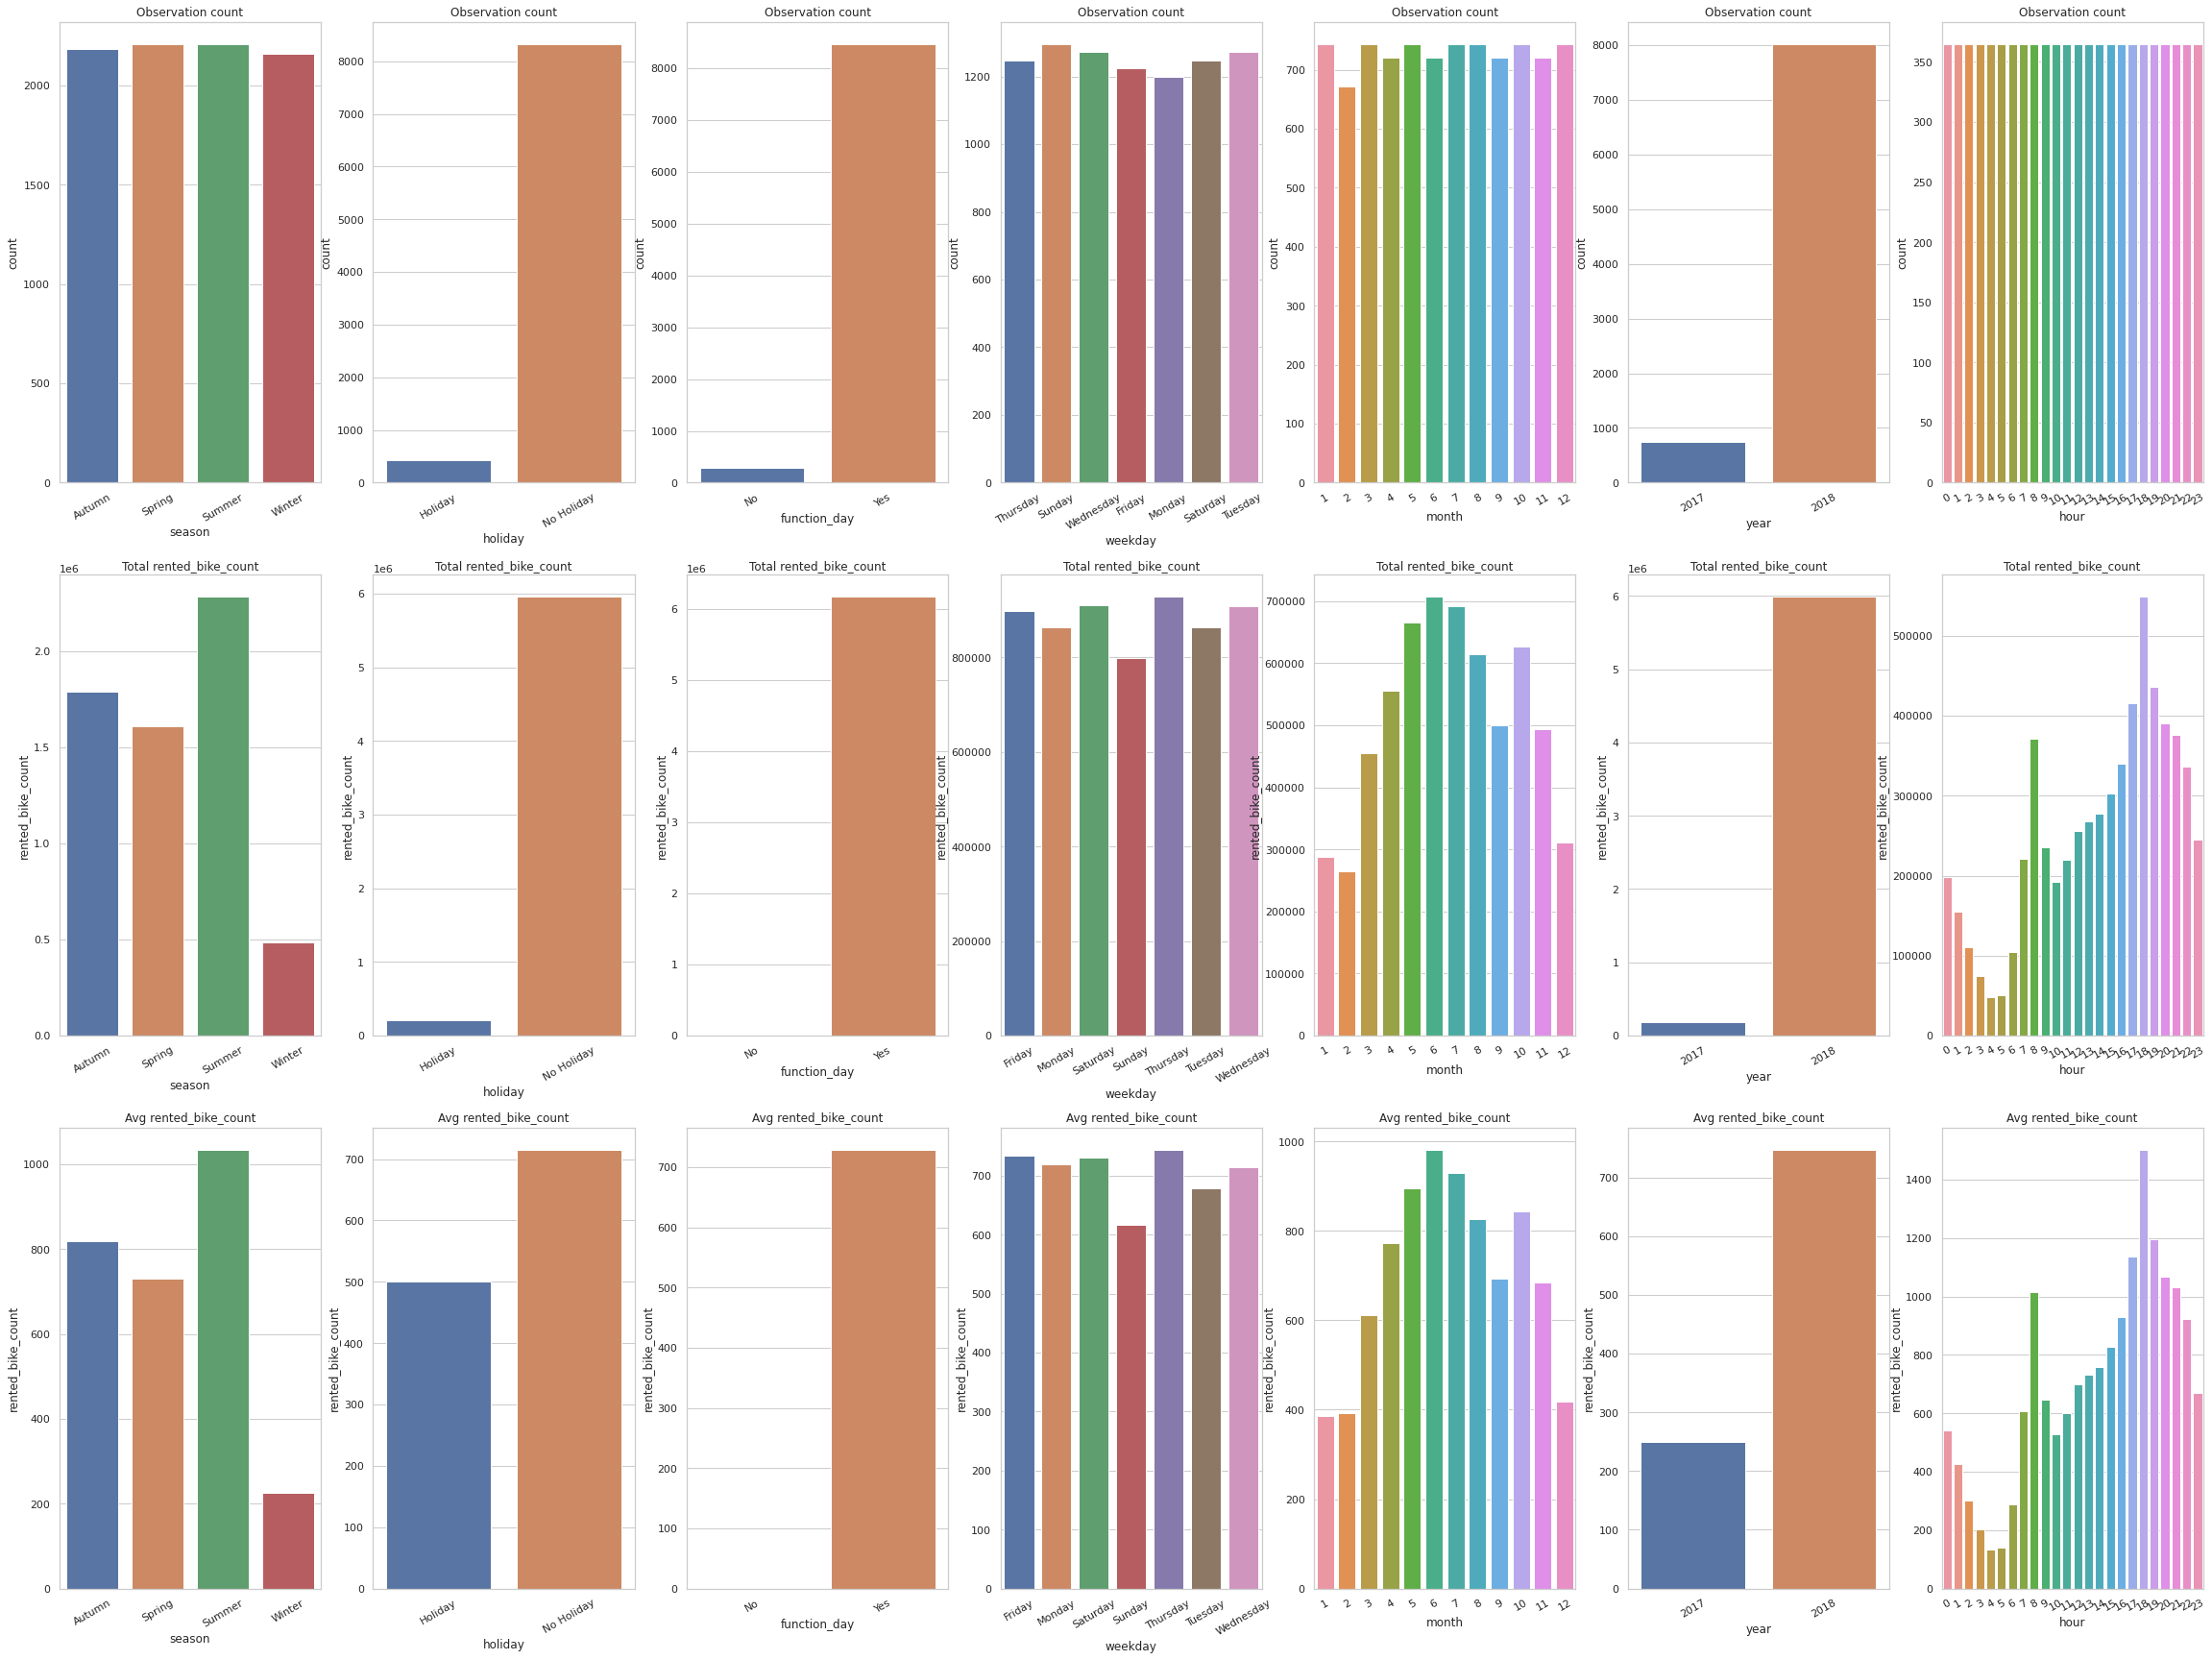

In [ ]:
plt.figure(figsize=(40,30))
i=1
for cat in categorical:
    df2=df.groupby([cat]).agg({'rented_bike_count':'sum'}).reset_index()
    df3=df.groupby([cat]).agg({'rented_bike_count':'mean'}).reset_index()

    plt.subplot(3,7,i)
    sns.countplot( x=df[cat] ).set(title=f'Observation count')
    plt.xticks(rotation=30)
    plt.subplot(3,7,i+7)
    sns.barplot(x=df2[cat], y=df2.rented_bike_count).set(title=f'Total rented_bike_count')
    plt.xticks(rotation=30)
    plt.subplot(3,7,i+14)
    sns.barplot(x=df3[cat], y=df3.rented_bike_count).set(title=f'Avg rented_bike_count')
    plt.xticks(rotation=30)
    i=i+1

* Winter	Summer	1 December
* Spring	Autumn	1 March
* Summer	Winter	1 June
* Autumn	Spring	1 September

#### **See different features pattern every hour**

[Text(0.5, 1.0, 'Avg rented_bike_count')]

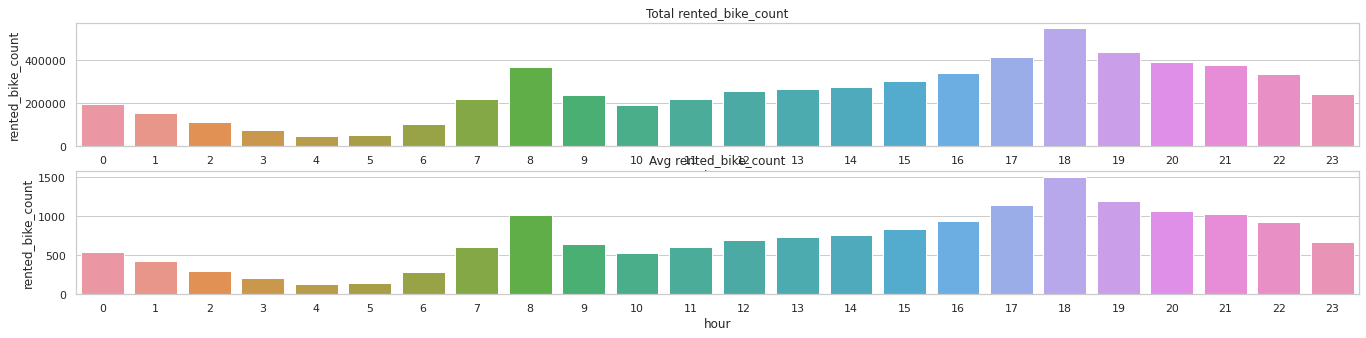

In [ ]:
plt.figure(figsize=(23,5))
df2=df.groupby(['hour']).agg({'rented_bike_count':'sum'}).reset_index()
df3=df.groupby(['hour']).agg({'rented_bike_count':'mean'}).reset_index()

plt.subplot(2,1,1)
sns.barplot(x=df2['hour'], y=df2.rented_bike_count).set(title=f'Total rented_bike_count')
plt.subplot(2,1,2)
sns.barplot(x=df3['hour'], y=df3.rented_bike_count).set(title=f'Avg rented_bike_count')


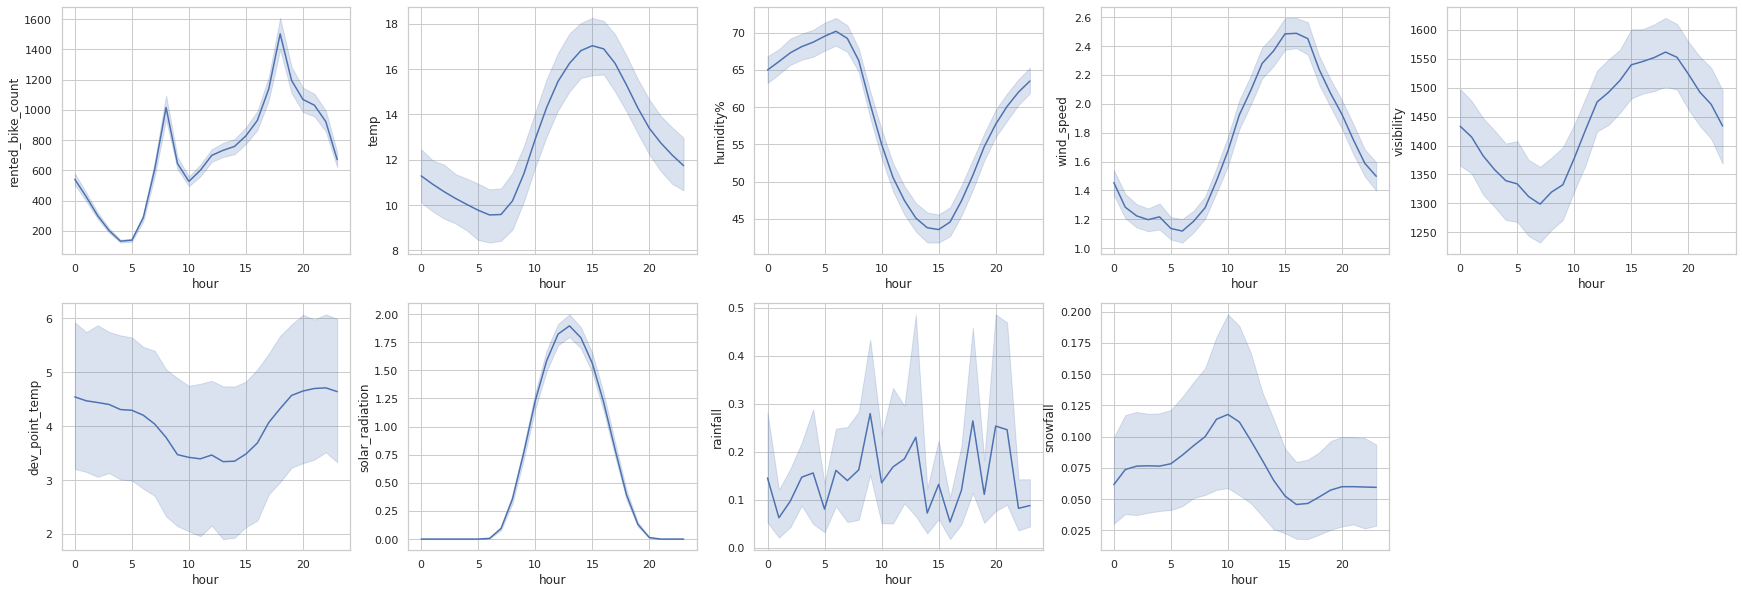

In [ ]:
plt.figure(figsize=(30,10))
i=1
for cat in ['rented_bike_count', 'temp', 'humidity%', 'wind_speed', 'visibility', 
            'dev_point_temp', 'solar_radiation', 'rainfall','snowfall']:
    plt.subplot(2,5,i)
    # sns.barplot( x=df.month, y=df[cat], hue=None)
    sns.lineplot( x=df.hour, y=df[cat], hue=None)
    i=i+1

#### **See different features pattern every month**

[Text(0.5, 1.0, 'Avg rented_bike_count')]

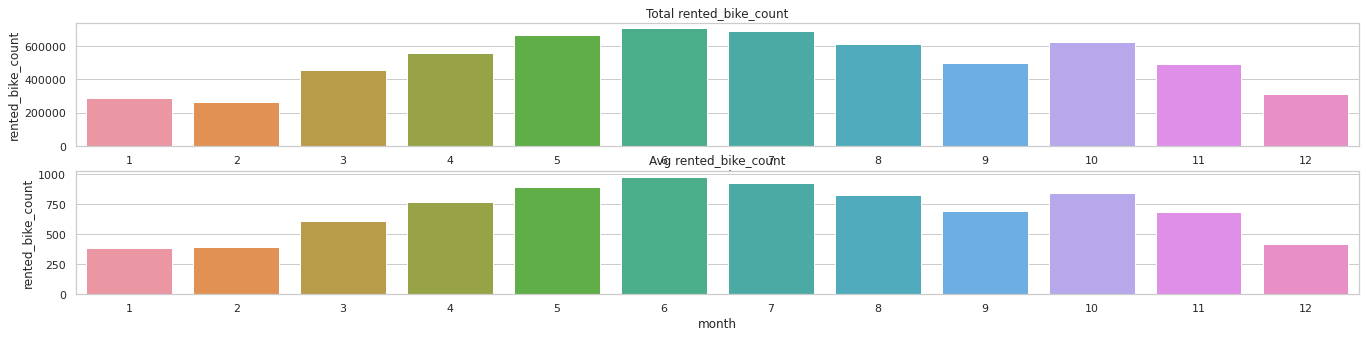

In [ ]:
plt.figure(figsize=(23,5))
df2=df.groupby(['month']).agg({'rented_bike_count':'sum'}).reset_index()
df3=df.groupby(['month']).agg({'rented_bike_count':'mean'}).reset_index()

plt.subplot(2,1,1)
sns.barplot(x=df2['month'], y=df2.rented_bike_count).set(title=f'Total rented_bike_count')
plt.subplot(2,1,2)
sns.barplot(x=df3['month'], y=df3.rented_bike_count).set(title=f'Avg rented_bike_count')

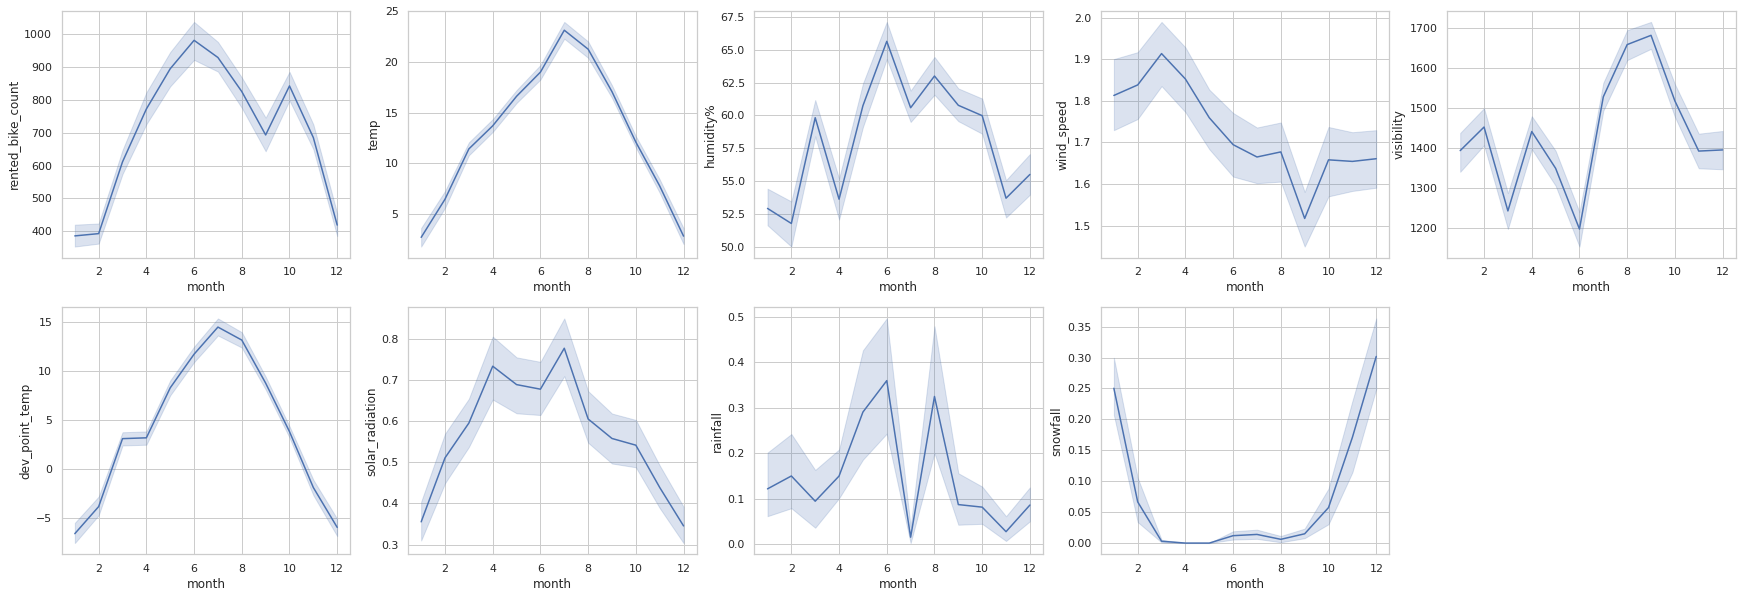

In [ ]:
plt.figure(figsize=(30,10))
i=1
for cat in ['rented_bike_count', 'temp', 'humidity%', 'wind_speed', 'visibility', 
            'dev_point_temp', 'solar_radiation', 'rainfall','snowfall']:
    plt.subplot(2,5,i)
    # sns.barplot( x=df.month, y=df[cat], hue=None)
    sns.lineplot( x=df.month, y=df[cat], hue=None)
    i=i+1


**Scaling the above input**

In [ ]:
x=df[['rented_bike_count', 'hour', 'temp', 'humidity%', 'wind_speed', 'visibility','dev_point_temp', 'solar_radiation', 'rainfall','snowfall']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.69865046, -1.66132477, -1.51395724, ..., -0.65513172,
        -0.13179988, -0.17189109],
       [-0.77617457, -1.51686175, -1.53907415, ..., -0.65513172,
        -0.13179988, -0.17189109],
       [-0.82423951, -1.37239873, -1.58093567, ..., -0.65513172,
        -0.13179988, -0.17189109],
       ...,
       [-0.0164383 ,  1.37239873, -0.86091752, ..., -0.65513172,
        -0.13179988, -0.17189109],
       [ 0.01147038,  1.51686175, -0.90277904, ..., -0.65513172,
        -0.13179988, -0.17189109],
       [-0.18699134,  1.66132477, -0.91952365, ..., -0.65513172,
        -0.13179988, -0.17189109]])

In [ ]:
# convert array x into Datafarme
df_scaled= pd.DataFrame(x_scaled, columns =x.columns)

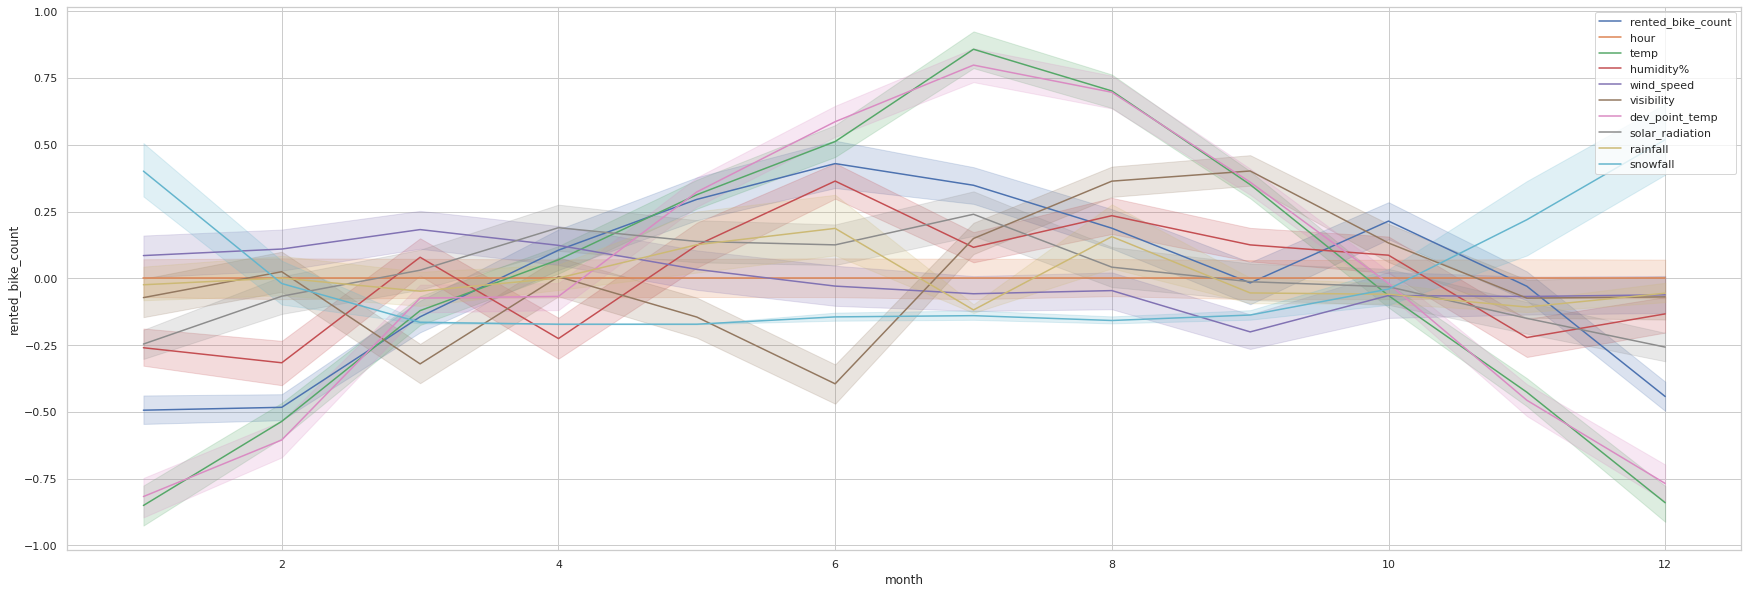

In [ ]:
plt.figure(figsize=(30,10))
i=1
for cat in ['rented_bike_count', 'hour', 'temp', 'humidity%', 'wind_speed', 'visibility', 
            'dev_point_temp', 'solar_radiation', 'rainfall','snowfall']:

    sns.lineplot( x=df.month, y=df_scaled[cat], hue=None, label=cat)
    i=i+1

#### **rented_bike_count  VS different features, Hue=['season', 'holiday', 'function_day']**

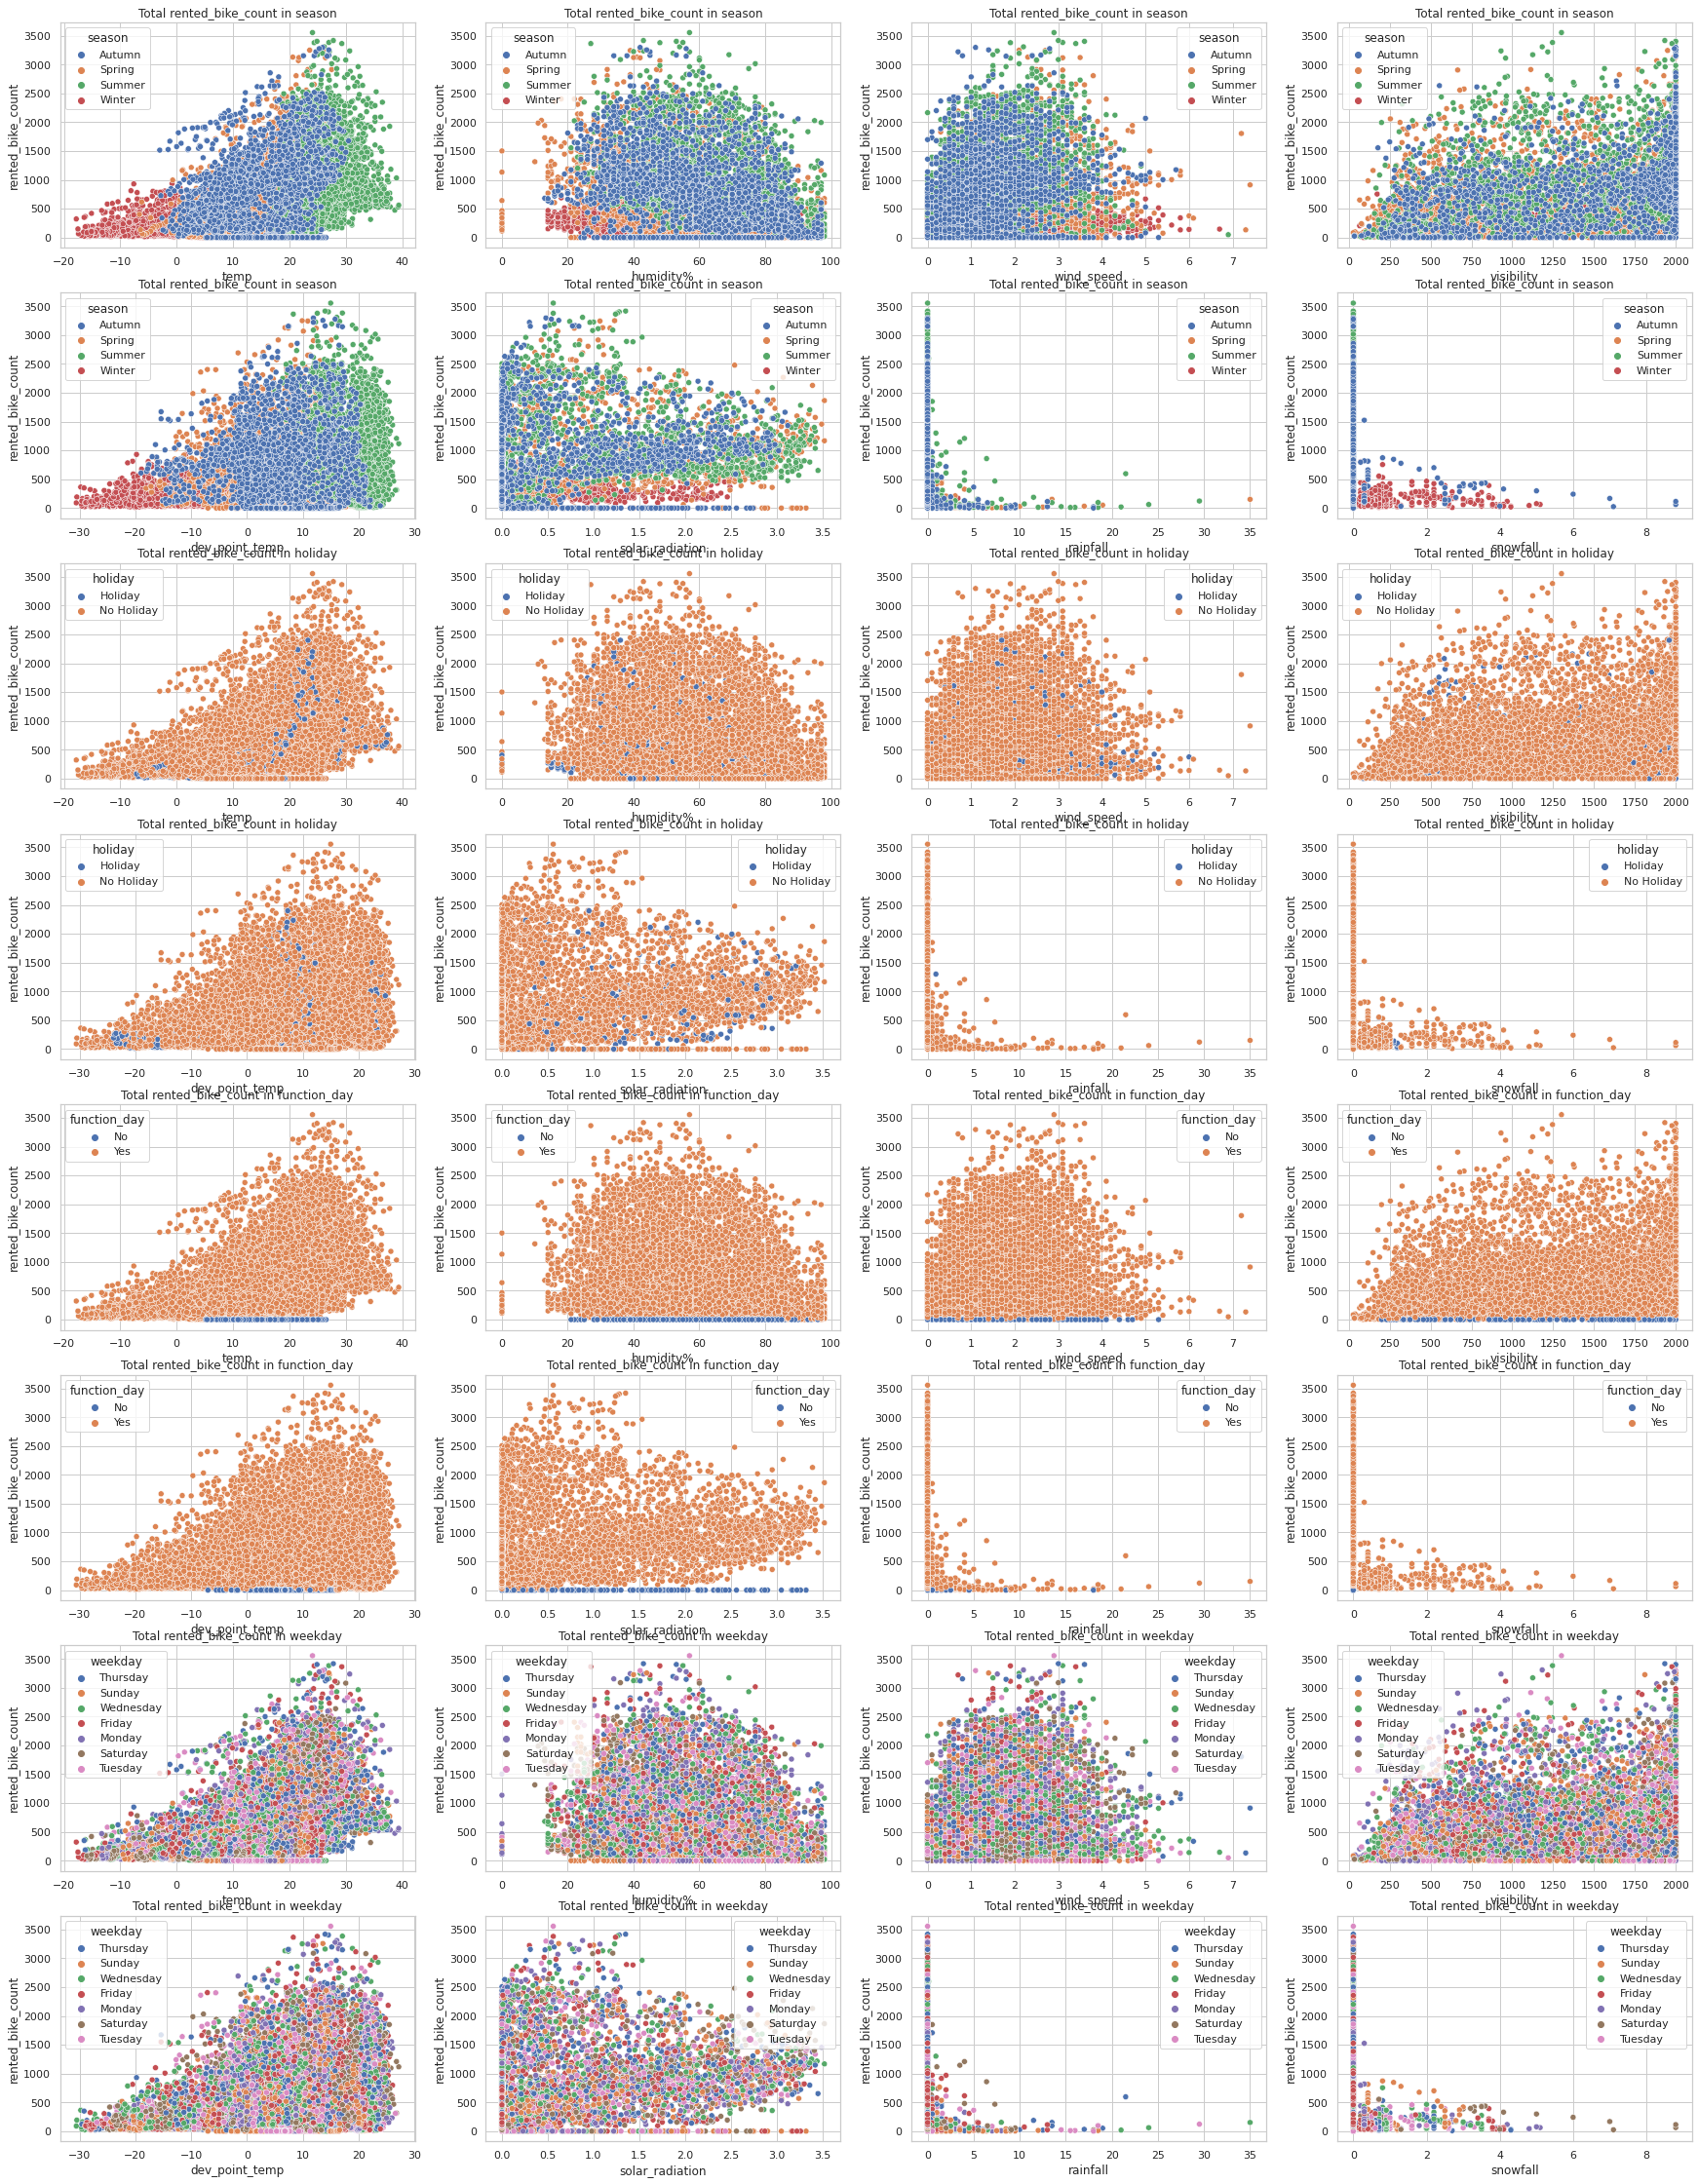

In [ ]:
i=1
plt.figure(figsize=(30,40))

for cat in ['season', 'holiday', 'function_day','weekday']:

    for city in [ 'temp', 'humidity%', 'wind_speed','visibility', 'dev_point_temp', 
                'solar_radiation', 'rainfall', 'snowfall']:
      
      plt.subplot(8,4,i)
      sns.scatterplot(y=df.rented_bike_count, x=df[city], hue=df[cat]).set(title=f'Total rented_bike_count in {cat}')#, size=df[cat], sizes=(20, 50) ).set(title=f'price range in {city}')
      i=i+1
       

#### **Outlier**

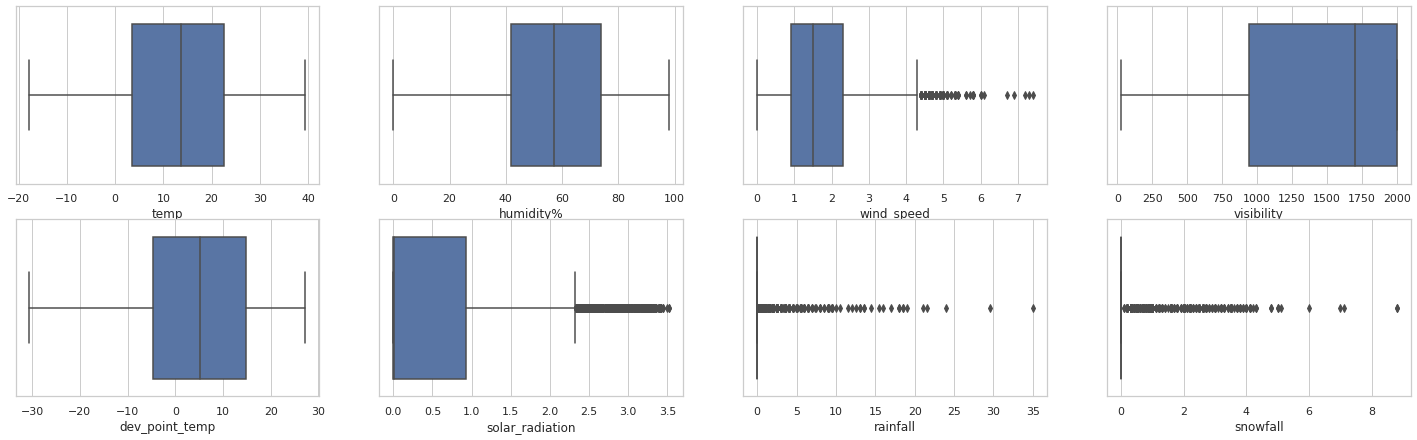

In [ ]:
plt.figure(figsize=(25,15))
i=1
for city in [  'temp', 'humidity%', 'wind_speed','visibility', 'dev_point_temp', 
                'solar_radiation', 'rainfall', 'snowfall']:
   plt.subplot(4,4,i)             
   sns.boxplot(x=df[city])   
   i=i+1      

###**Preparing DATA for Machine Learning**

#### **Multicollinearity**

In [ ]:
# Numeric columns
numerical=['rented_bike_count','temp', 'humidity%', 'wind_speed','visibility', 'dev_point_temp', 'solar_radiation', 'rainfall','snowfall']

# Categorical columns
categorical=['season', 'holiday', 'function_day','weekday','month', 'year','hour']

Text(0.5, 1.0, 'Overall Correlation with Price')

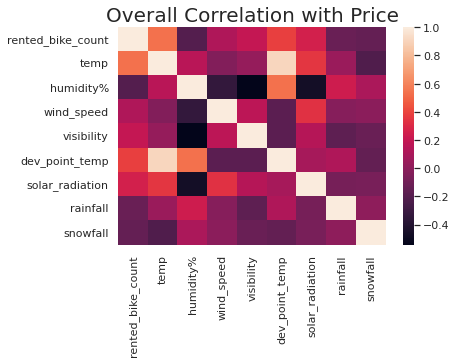

In [ ]:
sns.heatmap(df[numerical].corr()).set_title('Overall Correlation with Price',fontsize =20)

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Add constant to df we get df1
df1=add_constant(df)
df1.describe().columns

Index(['const', 'rented_bike_count', 'hour', 'temp', 'humidity%', 'wind_speed',
       'visibility', 'dev_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'month', 'year'],
      dtype='object')

In [ ]:
# Numeric columns in df1
numeric=['const', 'rented_bike_count', 'temp', 'humidity%', 'wind_speed','visibility', 'dev_point_temp', 'solar_radiation', 'rainfall','snowfall']

In [ ]:
# VIF of  dataframe x
def vif(numerical_list):
  # define vif that takes argument as list of columns
    x=df1[numerical_list]
    a=pd.Series([(variance_inflation_factor(x.values,i)) for i in range(x.shape[1])], index=x.columns)
    return (a)

In [ ]:
vif(['const', 'rented_bike_count', 'temp', 'humidity%', 'wind_speed','visibility', 'solar_radiation', 'rainfall','snowfall'])

const                50.337681
rented_bike_count     1.661014
temp                  2.273285
humidity%             2.578001
wind_speed            1.210906
visibility            1.544249
solar_radiation       1.933145
rainfall              1.080195
snowfall              1.088878
dtype: float64

**There is no multicolinearity in ['const', 'rented_bike_count', 'temp', 'humidity%', 'wind_speed','visibility', 'solar_radiation', 'rainfall','snowfall']**

In [ ]:
# To create dummy columns for rest of the categorical feature we use "One Hot Encoding"
df2 = pd.get_dummies(df, columns=categorical, drop_first=True)
df2.drop(columns=['date','dev_point_temp'],inplace=True)
df2.head(2)

rented_bike_count  temp  humidity%  ...  hour_21  hour_22  hour_23
0                254  -5.2         37  ...        0        0        0
1                204  -5.5         38  ...        0        0        0

[2 rows x 54 columns]

In [ ]:
# Hence after doing VIF and ONEHOTENCODER the Dependent and Independent Variable are
independent=['temp', 'humidity%', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall',
       'season_Spring', 'season_Summer', 'season_Winter', 'holiday_No Holiday','function_day_Yes', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday','weekday_Wednesday', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11','month_12', 'year_2018', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11','hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']
dependent=['rented_bike_count']

#### **Converting all the columns of df2 in to normal distribution and scale the input (independent variable) of df2**

In [ ]:
# We will make all the distrubution into normal distribution using yeo-johnson
from sklearn.preprocessing import PowerTransformer
jhon=PowerTransformer(method='yeo-johnson')

x_trasformed=jhon.fit_transform(df2)

# convert array feature into dataframe
from pandas.core.frame import DataFrame
df3=DataFrame(x_trasformed,columns=df2.columns)

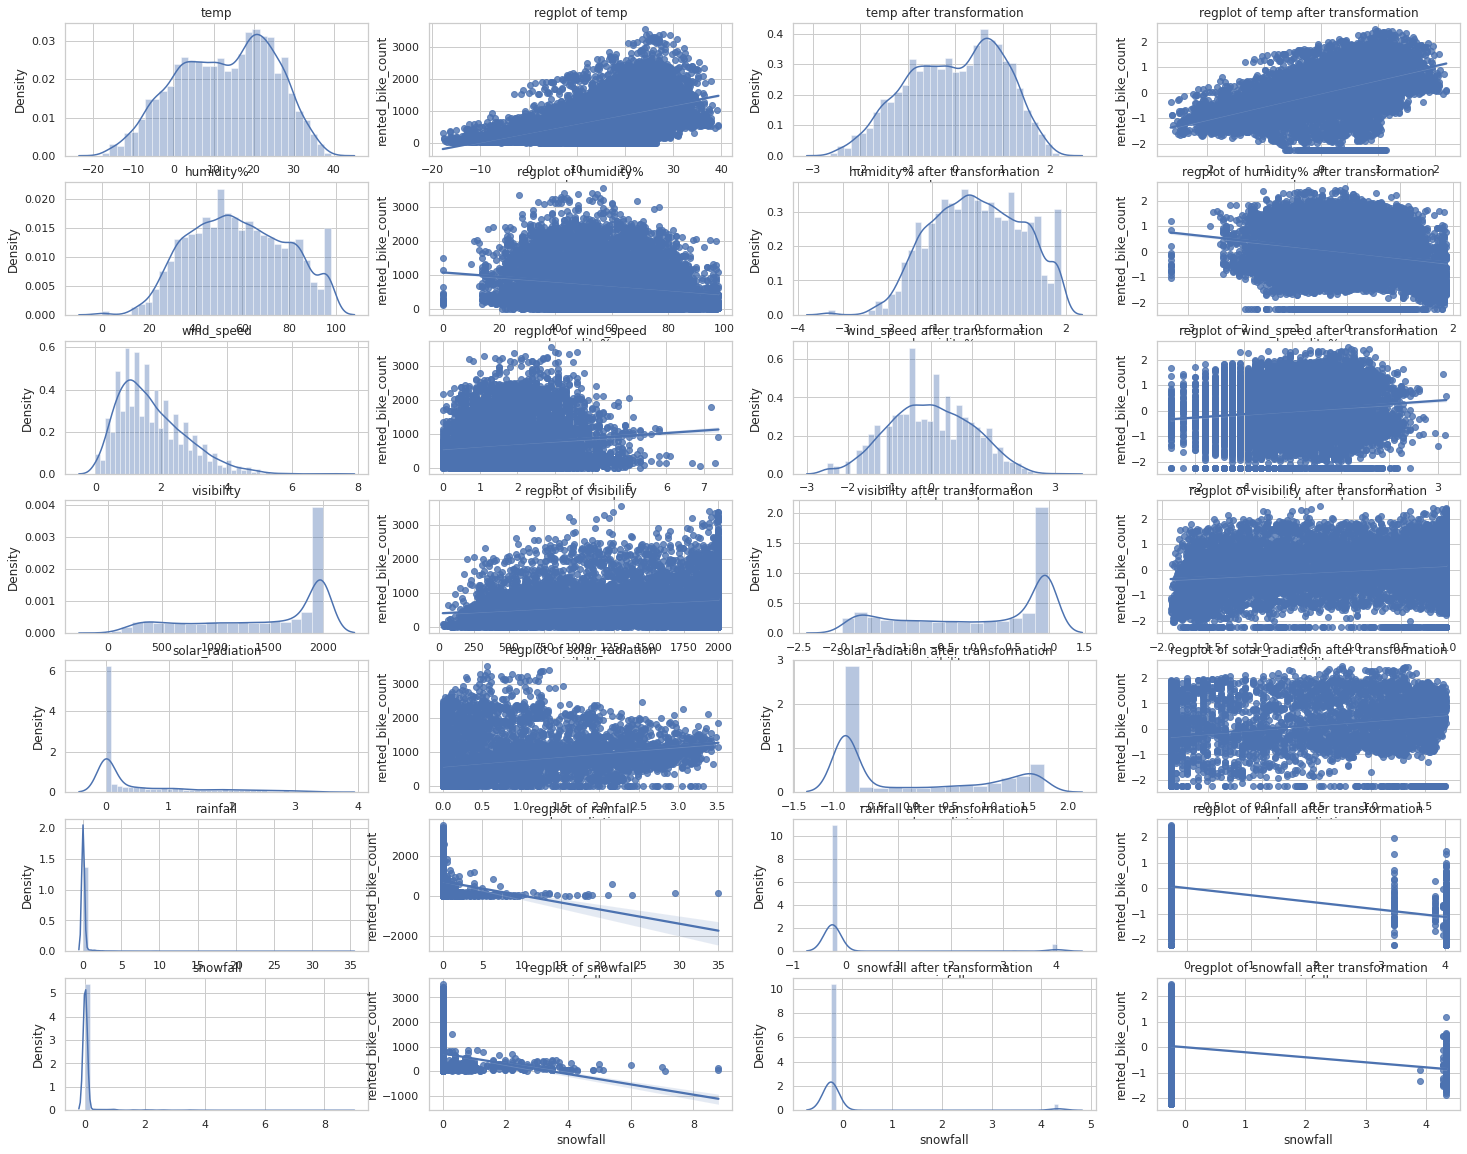

In [ ]:
# distplot and regplot rented_bike_count VS features ("df2 is without transformation" and "df3 is transformed into normal distribution")
plt.figure(figsize=(25,20))
i=1
for city in [ 'temp', 'humidity%', 'wind_speed','visibility','solar_radiation', 'rainfall', 'snowfall']:

   plt.subplot(7,4,i)             
   sns.distplot(x=df2[city]).set(title=f'{city}') 
   plt.subplot(7,4,i+1)             
   sns.regplot(x=df2[city],y=df2.rented_bike_count).set(title=f'regplot of {city}')    
   # plots after transformation
   plt.subplot(7,4,i+2)             
   sns.distplot(df3[city]).set(title=f'{city} after transformation') 
   plt.subplot(7,4,i+3)             
   sns.regplot(x=df3[city],y=df3.rented_bike_count).set(title=f'regplot of {city} after transformation') 
   i=i+4

**df3 is transformed into normal distribution**

In [ ]:
# Scaling Independent variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_independent_var=scaler.fit_transform(df3[independent])
# Convert the scaled array into DataFrame
df4=DataFrame(scaled_independent_var,columns=df3[independent].columns)

**df4 is scaled input variable**

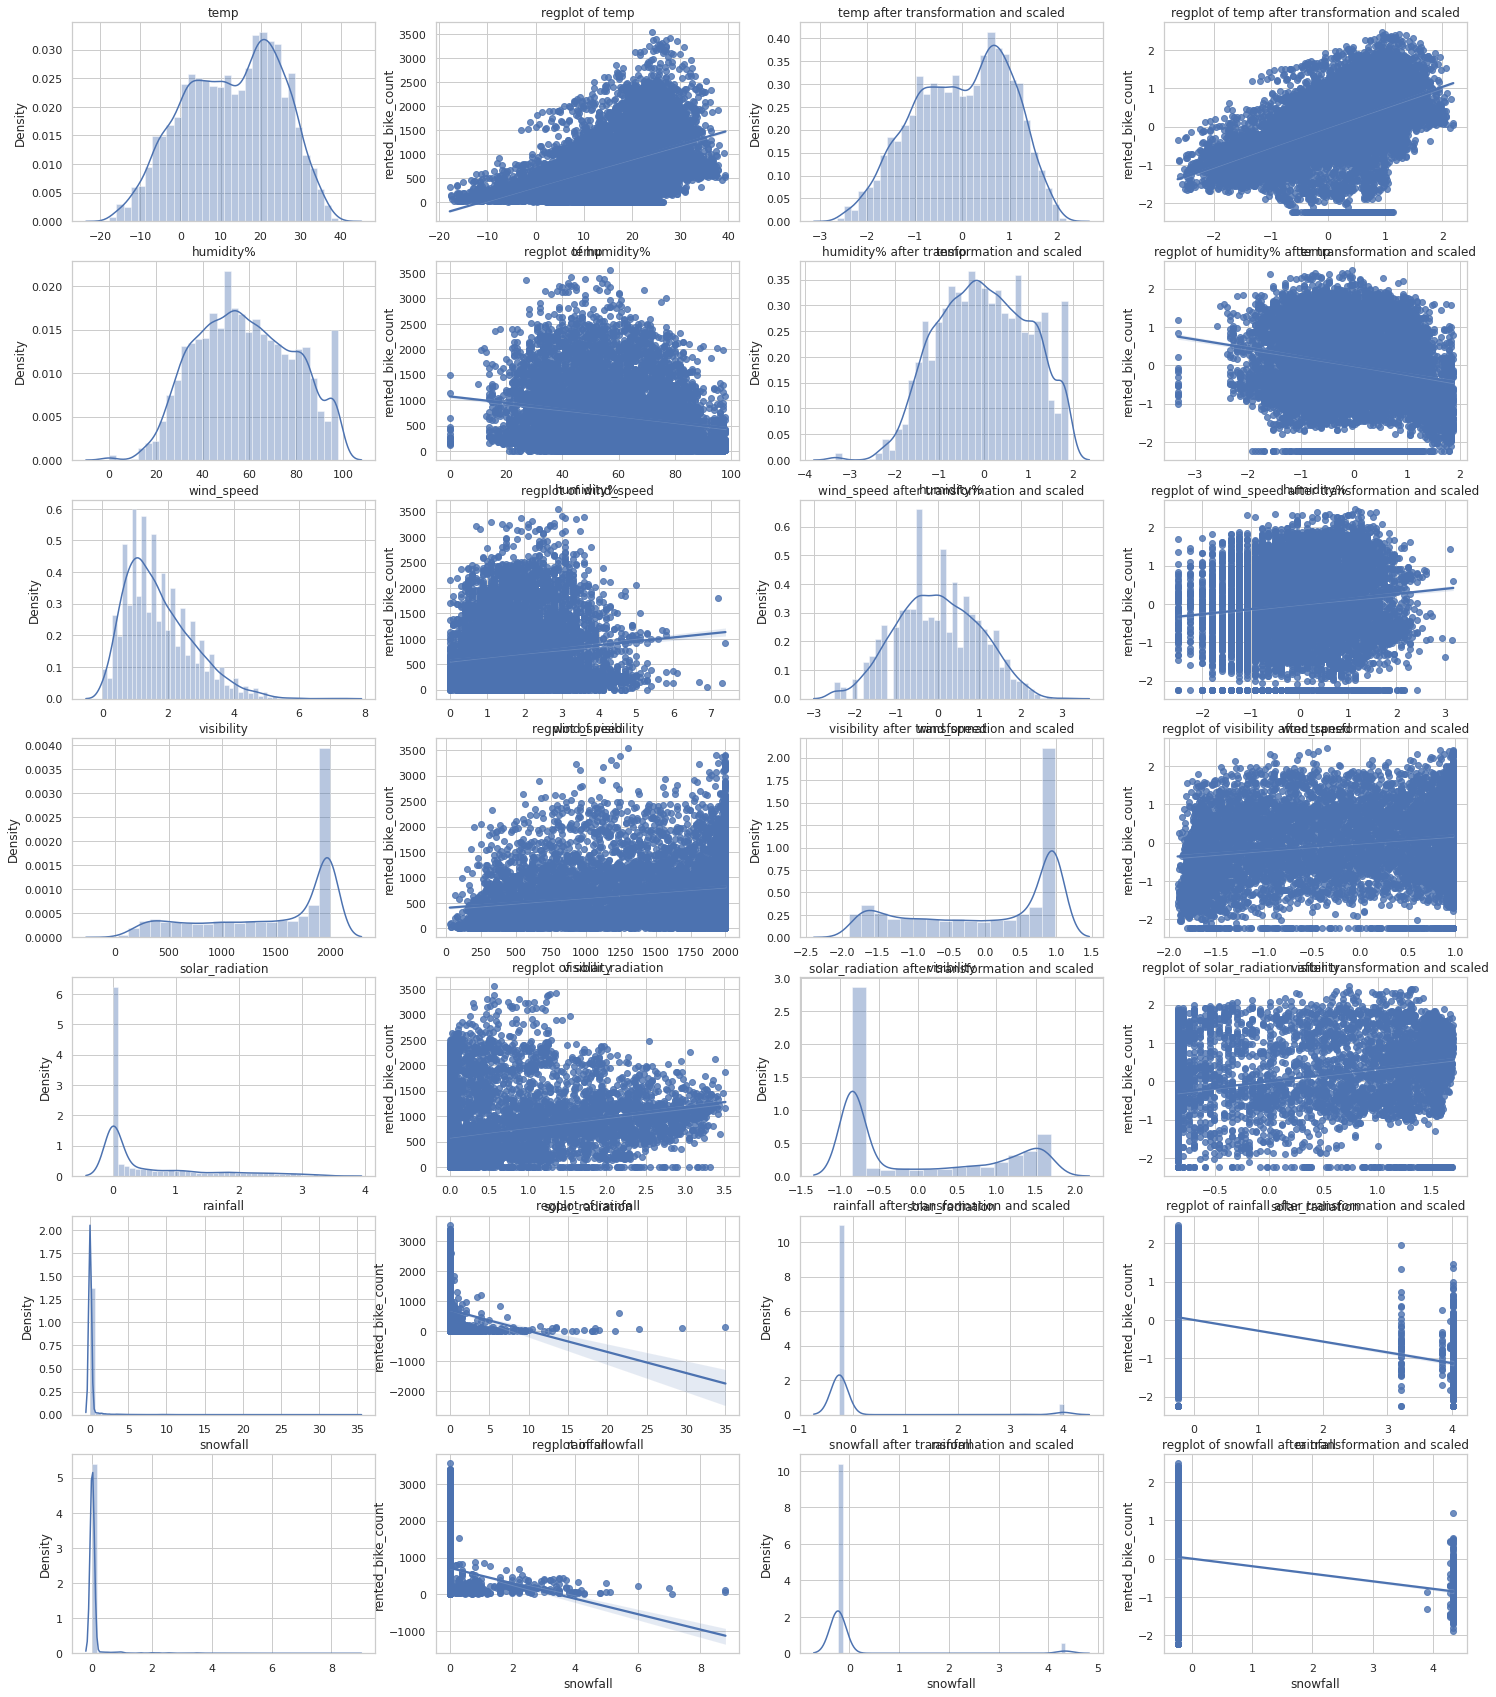

In [ ]:
# distplot and regplot rented_bike_count VS features ("df2 is without transformation" and "df4 is scaled of df3 (transformed into normal distribution)")
plt.figure(figsize=(25,30))
i=1
for city in [ 'temp', 'humidity%', 'wind_speed','visibility','solar_radiation', 'rainfall', 'snowfall']:

   plt.subplot(7,4,i)             
   sns.distplot(x=df2[city]).set(title=f'{city}')
   plt.subplot(7,4,i+1)             
   sns.regplot(x=df2[city],y=df2.rented_bike_count).set(title=f'regplot of {city}')    
   # plots after transformation
   plt.subplot(7,4,i+2)             
   sns.distplot(df4[city]).set(title=f'{city} after transformation and scaled')
   plt.subplot(7,4,i+3)             
   sns.regplot(x=df4[city],y=df3.rented_bike_count).set(title=f'regplot of {city} after transformation and scaled')
   i=i+4

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df4[independent],df3['rented_bike_count'], test_size=0.2, random_state=0)

In [ ]:
# data will give all the scoring of the test and train data
def data(ml):
   ml.fit(x_train,y_train)
   y_pred = ml.predict(x_test)
   
   # Scoring/ Evaluation Matrics 
   print(f'rmse={np.sqrt(mean_squared_error(y_test,y_pred))}')
   R2=r2_score(y_test,y_pred)
   print(f'r2={R2}')
   Adj_r2 =1-(1-R2)*(7008-1)/(7008-54-1)
   print(f'adj_r2={Adj_r2}')

   # Cross Validation Score
   from sklearn.model_selection import cross_val_score
   score = cross_val_score(ml,scaled_independent_var,df3['rented_bike_count'],scoring='r2',cv= 10)
   print(f'cv_mean_score={np.mean(score)}')

   #
   print(f'max_score={max(score)}')
   print(f'overfitting_score_train={ml.score(x_train,y_train)}')
   print(f'overfitting_score_test={ml.score(x_test,y_test)}')